In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [15]:
import seaborn as sns
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
import cv2
# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [21]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'

In [20]:
pip install gradio

ERROR: Could not find a version that satisfies the requirement gradio (from versions: none)
ERROR: No matching distribution found for gradio
Note: you may need to restart the kernel to use updated packages.


In [3]:
lab = ['PNEUMONIA', 'NORMAL']
def data(data_dir):
    data = [] 
    for lab1 in lab: 
        path = os.path.join(data_dir, lab1)
        class_num = lab.index(lab1)
        for image in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (150, 150)) # Reshape
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


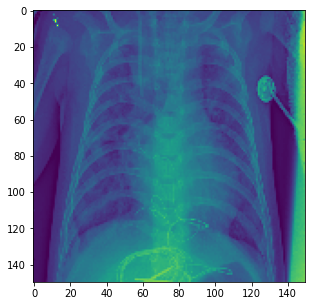

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0])##pneumonia

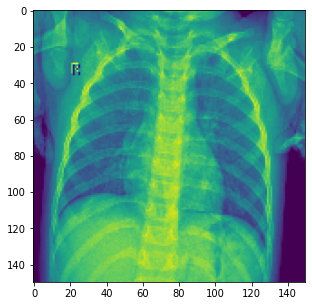

In [6]:
plt.figure(figsize = (5,5)) 
plt.imshow(train[-1][0])##normal

In [7]:
xTrain = []
yTrain = []
xTest = []
yTest = []
for feature, lab1 in train:
    xTrain.append(feature)
    yTrain.append(lab1)
for feature, lab1 in test:
    xTest.append(feature)
    yTest.append(lab1)

In [8]:
xTrain = np.array(xTrain) / 255
xTest = np.array(xTest) / 255

In [9]:
xTrain = xTrain.reshape(-1, 150, 150, 1)
yTrain = np.array(yTrain)

xTest = xTest.reshape(-1, 150, 150, 1)
yTest = np.array(yTest)

In [10]:
fitmodel = ImageDataGenerator()
fitmodel.fit(xTrain)

In [16]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [17]:
model.compile(optimizer = "rmsprop" ,
              loss = 'binary_crossentropy' , 
              metrics = ['accuracy'])


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               23040128  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [19]:
model.fit(xTrain,yTrain, batch_size = 32 ,epochs = 4)      
      

2022-10-25 07:44:22.557678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
163/163 [==============================] - 29s 172ms/step - loss: 3.4851 - accuracy: 0.9003
Epoch 2/4
163/163 [==============================] - 28s 174ms/step - loss: 0.2254 - accuracy: 0.9457
Epoch 3/4
163/163 [==============================] - 28s 171ms/step - loss: 0.1266 - accuracy: 0.9659
Epoch 4/4
163/163 [==============================] - 29s 176ms/step - loss: 0.1216 - accuracy: 0.9753
